In [3]:
import glob
import os
import sys
import librosa
import librosa.display
import librosa.core
import math
import seaborn as sns
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy import signal

import pickle
import pdb
import h5py
 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

%matplotlib inline 

plt.rcParams['figure.figsize'] = (6.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'Blues'


In [15]:
filename = '/home/marklee/IAM/vibration_project/audio/recording.wav'
print(filename)
    

audio_input, sample_rate = librosa.load(filename, mono=False)




/home/marklee/IAM/vibration_project/audio/recording.wav
X:  [[-0.00119711 -0.00187222 -0.00195469 ... -0.00122337 -0.00160549
   0.        ]
 [ 0.00030059  0.00048577  0.00055374 ...  0.00033507  0.00014265
   0.        ]
 [ 0.0019151   0.00293767  0.00299412 ...  0.00110831  0.00137266
   0.        ]
 [ 0.00283812  0.00426552  0.00397679 ...  0.00335614  0.00376276
   0.        ]]
size:  (4, 1519552)


In [17]:
# X = np.array(X)
print("X: ",audio_input)
print("size: ",audio_input.shape)

print("size: ",audio_input[0,:].shape)

X:  [[-0.00119711 -0.00187222 -0.00195469 ... -0.00122337 -0.00160549
   0.        ]
 [ 0.00030059  0.00048577  0.00055374 ...  0.00033507  0.00014265
   0.        ]
 [ 0.0019151   0.00293767  0.00299412 ...  0.00110831  0.00137266
   0.        ]
 [ 0.00283812  0.00426552  0.00397679 ...  0.00335614  0.00376276
   0.        ]]
size:  (4, 1519552)
size:  (1519552,)


In [23]:
# short-time Fourier Transform
n_fft = 2048 #standard for audio (speech is 512)
hop_length = 512 #n_fft / 4

D = np.abs(librosa.stft(audio_input[0,:], n_fft=n_fft,  hop_length=hop_length)) # STFT of audio channels
DB = librosa.amplitude_to_db(D, ref=np.max)



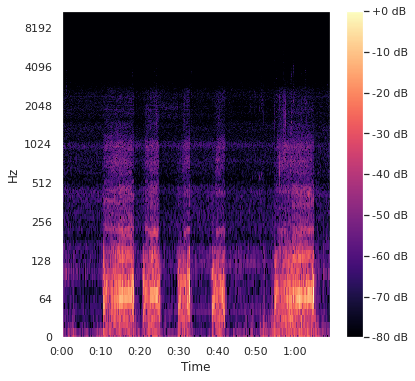

In [24]:
plt.figure()
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');

plt.colorbar(format='%+2.0f dB');

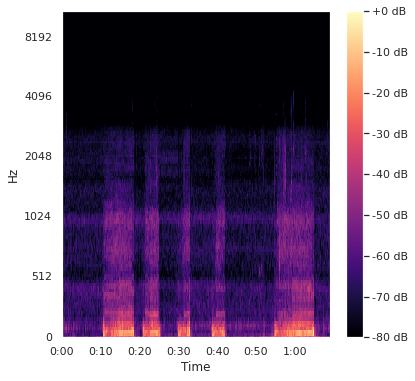

In [26]:
n_mels = 128
mel = librosa.filters.mel(sr=sample_rate, n_fft=n_fft, n_mels=n_mels)

S = librosa.feature.melspectrogram(audio_input[0,:], sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');

#https://towardsdatascience.com/getting-to-know-the-mel-spectrogram-31bca3e2d9d0

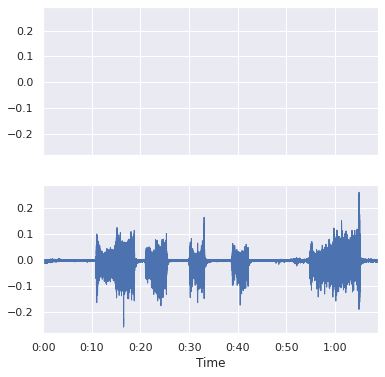

In [27]:
    
# plot_audio(skill_name, X, sample_rate, channel_names)
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.waveplot(X,sr=sample_rate)
